In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
# from google.colab import files
import torch.nn.init as init

In [3]:
df = pd.read_csv('C:/Users/91738/RAID OSR Project/Datasets/data (2).csv')

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,sleep_score
0,-29716.812,26.260498,183.901950,-191.234620,28.111542,-138.319730,9.611153,-33.660805,-6.205944,24.756470,66.299470
1,61582.188,-100.235990,-67.204800,-63.652220,5.112045,-102.239640,8.236137,-1.796333,6.566654,11.270596,72.328720
2,-347637.380,-309.127700,-162.610120,232.288670,-55.700798,64.116590,-56.246410,-37.711060,-19.803879,6.339809,74.269295
3,-75634.500,-226.529140,-86.022095,-68.349270,-23.771538,-104.866660,-27.170800,-25.899551,-5.487747,9.070866,74.963680
4,-340416.060,-173.230620,65.407990,-69.629180,-23.440826,-148.422790,-26.189170,-63.191936,-19.332706,32.760980,69.316696
...,...,...,...,...,...,...,...,...,...,...,...
29995,-372076.100,-209.595250,-38.329010,51.064210,-28.736916,-107.920820,-34.552826,-57.680600,-18.706600,27.470993,71.606570
29996,283526.200,-102.611390,-144.557980,-27.526794,-10.881226,73.850690,-16.892555,43.190460,10.181782,-19.643436,74.864210
29997,-284105.800,-15.228516,101.034390,-17.132996,1.419510,-67.230804,-17.945099,-46.702652,-18.517296,21.768631,66.464420
29998,265753.620,97.336914,81.218350,-112.504330,71.406070,-94.724550,38.361900,21.743484,18.959126,-2.515305,70.319016


In [5]:
# class Model(nn.Module):
#     def __init__(self):
#         super(Model, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.gru1 = nn.GRU(10, 16, 3, batch_first=True)
#         self.fc1 = nn.Linear(16, 64)
#         self.gru2 = nn.GRU(64, 8, 4, batch_first=True)
#         self.fc2 = nn.Linear(8, 1)

#     def forward(self, x):
#         out, _ = self.gru1(x)
#         # out = torch.tanh(self.fc1(out))
#         out = self.fc1(out)
#         out, _ = self.gru2(out)
#         out = self.fc2(out)
#         return out

In [6]:
# class Model(nn.Module):
#     def __init__(self):
#         super(Model, self).__init__()
#         self.gru1 = nn.GRU(10, 16, 2, batch_first=True)
#         self.bn1 = nn.BatchNorm1d(16)
#         self.fc1 = nn.Linear(16, 64)
#         self.bn2 = nn.BatchNorm1d(64)
#         self.gru2 = nn.GRU(64, 8, 2, batch_first=True)
#         self.bn3 = nn.BatchNorm1d(8)
#         self.fc2 = nn.Linear(8, 1)

#         # Initialize linear layers with Xavier (Glorot) initialization
#         init.xavier_uniform_(self.fc1.weight)
#         init.xavier_uniform_(self.fc2.weight)

#         # Initialize GRU layers with Xavier initialization
#         for name, param in self.gru1.named_parameters():
#             if 'weight' in name:
#                 init.xavier_normal_(param)
#         for name, param in self.gru2.named_parameters():
#             if 'weight' in name:
#                 init.xavier_normal_(param)

#     def forward(self, x):
#         out, _ = self.gru1(x)
#         out = self.bn1(out)
#         out = self.fc1(out)
#         out = self.bn2(out)
#         out, _ = self.gru2(out)
#         out = self.bn3(out)
#         out = self.fc2(out)
#         return out


In [7]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.gru1 = nn.GRU(10, 16, 2, batch_first=True)
        self.gru2 = nn.GRU(16, 1, 2, batch_first=True)

    def forward(self, x):
        out, _ = self.gru1(x)
        out, _ = self.gru2(out)
        return out


In [8]:
class LModel(nn.Module):
    def __init__(self):
        super(LModel, self).__init__()
        self.lstm1 = nn.LSTM(10, 16, 3, batch_first=True)
        self.fc1 = nn.Linear(16, 64)
        self.lstm2 = nn.LSTM(64, 8, 4, batch_first=True)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        out, _ = self.lstm1(x)
        # out = torch.tanh(self.fc1(out))
        out = self.fc1(out)  # Only take the last time step's output
        out, _ = self.lstm2(out)
        out = self.fc2(out)  # Only take the last time step's output
        return out


In [9]:
input_size = 10
hidden_size = 4
num_layers = 3
# Initialize the hidden state outside the loop
test = torch.randn(df.iloc[:,:10].shape)
h = torch.zeros(num_layers,  hidden_size)
print(test.shape)
gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
pp,_ = gru(test, h)
print(pp.shape)

torch.Size([30000, 10])
torch.Size([30000, 4])


In [10]:
class SleepDataTrain(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

In [11]:
class SleepDataVal(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

In [12]:
X, y = np.array(df.iloc[:,:10]), np.array(df.iloc[:,10])
X = torch.tensor(X)
y = torch.tensor(y)
print(X[111].shape,X.shape, y.shape)

torch.Size([10]) torch.Size([30000, 10]) torch.Size([30000])


In [13]:
# best_p,best_d,best_q = 1,2,1

# import statsmodels.api as sm
# from statsmodels.tsa.arima.model import ARIMA


# model = ARIMA(y[:-1], order=(best_p, best_d, best_q))  # Replace p, d, q with appropriate values
# model_fit = model.fit()

# print(model_fit.summary())

In [14]:
# forecast = model_fit.forecast(steps=1)
# prediction = forecast[0]
# actual = y[-1]

# print("Actual expected value =",y[-1])
# print("Predicted value = ",prediction)

In [15]:
model = LModel()

In [16]:
X, y = np.array(df.iloc[:,:10]), np.array(df.iloc[:,10])
X_train = X[:int(len(X)*0.8)]
y_train = y[:int(len(y)*0.8)]
X = torch.tensor(X_train)
y = torch.tensor(y_train)
sleep_data_train = SleepDataTrain(X_train,y_train)

batch_size = 512
data_loader_train = DataLoader(sleep_data_train, batch_size=batch_size, shuffle=False)
# model = Model()

optimizer = torch.optim.Adam(model.parameters(), lr=0.008)
criterion = torch.nn.MSELoss()

In [17]:
# uploaded = files.upload()
# model = torch.load('CogNight_GRU.pth')

In [18]:
num_epochs = 50
loss_list_train = []

for i in range(num_epochs):
  lossy_list = []
  for j, data in enumerate(tqdm(data_loader_train)):
    X1, y1  = data
    X1 = X1.float()
    y1 = y1.float()
    output = model(X1)
    loss = criterion(output, y1)
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    loss.backward()
    optimizer.step()
    lossy_list.append(loss.data.tolist())

  a = np.mean(np.array(lossy_list))
  loss_list_train.append(a)
  print ("Epoch %d   Training Loss: %f"% (i+1, a))

  0%|          | 0/47 [00:00<?, ?it/s]c:\Users\91738\anaconda3\envs\tf\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([512])) that is different to the input size (torch.Size([512, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
 98%|█████████▊| 46/47 [00:25<00:00,  1.86it/s]c:\Users\91738\anaconda3\envs\tf\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([448])) that is different to the input size (torch.Size([448, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 47/47 [00:25<00:00,  1.84it/s]


Epoch 1   Training Loss: 4869.597313


100%|██████████| 47/47 [00:29<00:00,  1.61it/s]


Epoch 2   Training Loss: 4296.629633


100%|██████████| 47/47 [00:25<00:00,  1.85it/s]


Epoch 3   Training Loss: 3800.481736


100%|██████████| 47/47 [00:25<00:00,  1.85it/s]


Epoch 4   Training Loss: 3380.518238


100%|██████████| 47/47 [00:25<00:00,  1.84it/s]


Epoch 5   Training Loss: 3007.743933


100%|██████████| 47/47 [00:25<00:00,  1.83it/s]


Epoch 6   Training Loss: 2672.307394


100%|██████████| 47/47 [00:25<00:00,  1.85it/s]


Epoch 7   Training Loss: 2369.154525


100%|██████████| 47/47 [00:25<00:00,  1.85it/s]


Epoch 8   Training Loss: 2094.933760


100%|██████████| 47/47 [00:25<00:00,  1.82it/s]


Epoch 9   Training Loss: 1847.075063


100%|██████████| 47/47 [00:25<00:00,  1.84it/s]


Epoch 10   Training Loss: 1623.429571


100%|██████████| 47/47 [00:25<00:00,  1.83it/s]


Epoch 11   Training Loss: 1422.103061


100%|██████████| 47/47 [00:26<00:00,  1.78it/s]


Epoch 12   Training Loss: 1241.354383


100%|██████████| 47/47 [00:26<00:00,  1.78it/s]


Epoch 13   Training Loss: 1079.603088


100%|██████████| 47/47 [00:26<00:00,  1.75it/s]


Epoch 14   Training Loss: 935.385994


100%|██████████| 47/47 [00:26<00:00,  1.75it/s]


Epoch 15   Training Loss: 807.280337


100%|██████████| 47/47 [00:26<00:00,  1.81it/s]


Epoch 16   Training Loss: 693.939736


100%|██████████| 47/47 [00:26<00:00,  1.75it/s]


Epoch 17   Training Loss: 594.088439


100%|██████████| 47/47 [00:25<00:00,  1.81it/s]


Epoch 18   Training Loss: 506.516763


100%|██████████| 47/47 [00:25<00:00,  1.83it/s]


Epoch 19   Training Loss: 430.079215


100%|██████████| 47/47 [00:23<00:00,  1.98it/s]


Epoch 20   Training Loss: 363.692662


100%|██████████| 47/47 [00:24<00:00,  1.93it/s]


Epoch 21   Training Loss: 306.336697


100%|██████████| 47/47 [00:24<00:00,  1.89it/s]


Epoch 22   Training Loss: 257.053500


100%|██████████| 47/47 [00:25<00:00,  1.82it/s]


Epoch 23   Training Loss: 214.948120


100%|██████████| 47/47 [00:24<00:00,  1.89it/s]


Epoch 24   Training Loss: 179.188846


100%|██████████| 47/47 [00:25<00:00,  1.85it/s]


Epoch 25   Training Loss: 149.006769


100%|██████████| 47/47 [00:25<00:00,  1.85it/s]


Epoch 26   Training Loss: 123.695706


100%|██████████| 47/47 [00:26<00:00,  1.81it/s]


Epoch 27   Training Loss: 102.611097


100%|██████████| 47/47 [00:25<00:00,  1.87it/s]


Epoch 28   Training Loss: 85.168674


100%|██████████| 47/47 [00:25<00:00,  1.88it/s]


Epoch 29   Training Loss: 70.842858


100%|██████████| 47/47 [00:25<00:00,  1.85it/s]


Epoch 30   Training Loss: 59.164274


100%|██████████| 47/47 [00:29<00:00,  1.59it/s]


Epoch 31   Training Loss: 49.717075


100%|██████████| 47/47 [00:26<00:00,  1.80it/s]


Epoch 32   Training Loss: 42.136052


100%|██████████| 47/47 [00:25<00:00,  1.85it/s]


Epoch 33   Training Loss: 36.102948


100%|██████████| 47/47 [00:24<00:00,  1.92it/s]


Epoch 34   Training Loss: 31.343010


100%|██████████| 47/47 [00:23<00:00,  1.98it/s]


Epoch 35   Training Loss: 27.621294


100%|██████████| 47/47 [00:23<00:00,  1.97it/s]


Epoch 36   Training Loss: 24.738538


100%|██████████| 47/47 [00:24<00:00,  1.95it/s]


Epoch 37   Training Loss: 22.527447


100%|██████████| 47/47 [00:23<00:00,  1.97it/s]


Epoch 38   Training Loss: 20.849019


100%|██████████| 47/47 [00:24<00:00,  1.95it/s]


Epoch 39   Training Loss: 19.588756


100%|██████████| 47/47 [00:24<00:00,  1.91it/s]


Epoch 40   Training Loss: 18.653471


100%|██████████| 47/47 [00:23<00:00,  1.97it/s]


Epoch 41   Training Loss: 17.968016


100%|██████████| 47/47 [00:24<00:00,  1.95it/s]


Epoch 42   Training Loss: 17.472481


100%|██████████| 47/47 [00:24<00:00,  1.95it/s]


Epoch 43   Training Loss: 17.119585


100%|██████████| 47/47 [00:23<00:00,  2.00it/s]


Epoch 44   Training Loss: 16.872523


100%|██████████| 47/47 [00:23<00:00,  1.97it/s]


Epoch 45   Training Loss: 16.702901


100%|██████████| 47/47 [00:23<00:00,  1.98it/s]


Epoch 46   Training Loss: 16.589124


100%|██████████| 47/47 [00:23<00:00,  1.96it/s]


Epoch 47   Training Loss: 16.515042


100%|██████████| 47/47 [00:23<00:00,  1.97it/s]


Epoch 48   Training Loss: 16.468803


100%|██████████| 47/47 [00:23<00:00,  1.97it/s]


Epoch 49   Training Loss: 16.441820


100%|██████████| 47/47 [00:23<00:00,  1.97it/s]

Epoch 50   Training Loss: 16.427067


In [19]:
# torch.save(model, 'CogNight_GRU.pth')
# files.download('CogNight_GRU.pth')

In [20]:
X, y = np.array(df.iloc[:,:10]), np.array(df.iloc[:,10])
X_val = X[int(len(X)*0.8):]
y_val = y[int(len(y)*0.8):]
X = torch.tensor(X_val)
y = torch.tensor(y_val)
sleep_data_val = SleepDataVal(X_val,y_val)
data_loader_val = DataLoader(sleep_data_val, batch_size=32 , shuffle=True)

In [21]:
loss_list_val = []
model.eval()
for j, data in enumerate(tqdm(data_loader_val)):
  X1, y1  = data
  X1 = X1.float()
  y1 = y1.float()
  output = model(X1)
  loss = criterion(output, y1)
  loss_list_val.append(loss.data.tolist())

kk = np.mean(np.array(loss_list_val))
print()
print(kk)

  0%|          | 0/188 [00:00<?, ?it/s]c:\Users\91738\anaconda3\envs\tf\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
 98%|█████████▊| 185/188 [00:01<00:00, 96.23it/s] c:\Users\91738\anaconda3\envs\tf\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 188/188 [00:01<00:00, 97.65it/s]


23.383926396674298


In [22]:
model.eval()

output = model(X1)
# Compute the gradients (backpropagation)
lossy = criterion(output, y1)
lossy.backward()


for name, param in model.named_parameters():
    if param.grad is not None:
        print(f"Layer: {name}, Gradient Norm: {param.grad.norm().item()}")
    else:
        print(f"Layer: {name}, Gradient: None (no gradient computed for this layer)")

Layer: lstm1.weight_ih_l0, Gradient Norm: 1.5295465631906535e-12
Layer: lstm1.weight_hh_l0, Gradient Norm: 1.3271895833892212e-21
Layer: lstm1.bias_ih_l0, Gradient Norm: 2.165270455415066e-16
Layer: lstm1.bias_hh_l0, Gradient Norm: 2.165270455415066e-16
Layer: lstm1.weight_ih_l1, Gradient Norm: 3.6837964216829278e-06
Layer: lstm1.weight_hh_l1, Gradient Norm: 3.7644797001856745e-11
Layer: lstm1.bias_ih_l1, Gradient Norm: 2.6612012788973516e-06
Layer: lstm1.bias_hh_l1, Gradient Norm: 2.6612012788973516e-06
Layer: lstm1.weight_ih_l2, Gradient Norm: 4.087312390765874e-06
Layer: lstm1.weight_hh_l2, Gradient Norm: 1.1388541498735805e-10
Layer: lstm1.bias_ih_l2, Gradient Norm: 2.9063669444440166e-06
Layer: lstm1.bias_hh_l2, Gradient Norm: 2.9063669444440166e-06
Layer: fc1.weight, Gradient Norm: 8.986501597973984e-06
Layer: fc1.bias, Gradient Norm: 5.301299097482115e-06
Layer: lstm2.weight_ih_l0, Gradient Norm: 1.0307460797776002e-05
Layer: lstm2.weight_hh_l0, Gradient Norm: 7.976262428321945e

In [23]:
print(lossy)

tensor(35.1888, grad_fn=<MseLossBackward0>)


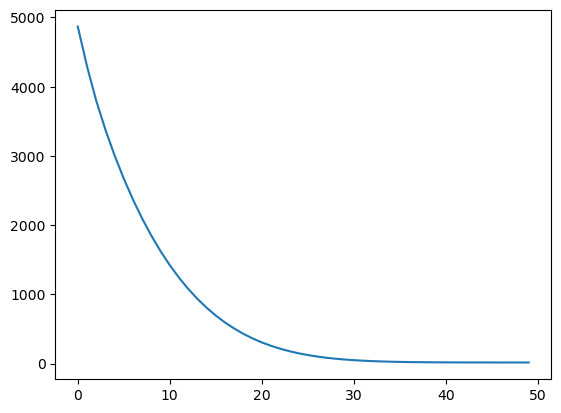

In [24]:
plt.plot(loss_list_train)

In [25]:
Xp = X.float()
op = model.forward(Xp)

In [26]:
opp = op.detach().numpy()

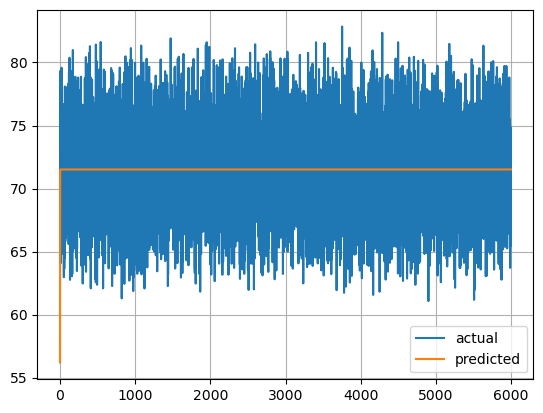

In [27]:
plt.plot(y,label='actual')
plt.plot(opp,label='predicted')
plt.legend()
plt.grid()
plt.show()

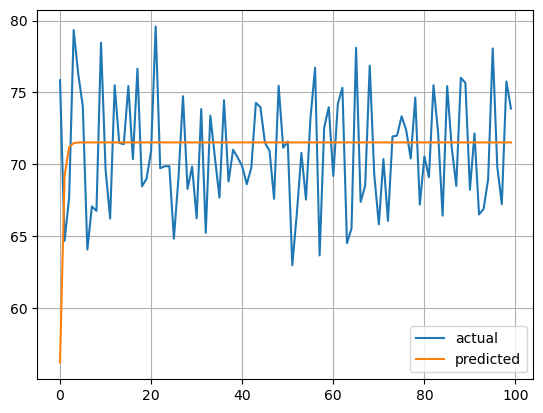

In [28]:
plt.plot(y[:100],label='actual')
plt.plot(opp[:100],label='predicted')
plt.legend()
plt.grid()
plt.show()